# 多元回归分析


多元线性回归模型表示为：
$$ f(x_i) = \mathbf{w}^T \mathbf{x}_i + b $$
其中，$\mathbf{w}$ 是权重向量，$b$ 是偏置项，$\mathbf{x}_i$ 是输入向量，$f(x_i)$ 是预测值。

### 参数估计
为了估计 $\mathbf{w}$ 和 $b$，可以使用最小二乘法。将 $\mathbf{w}$ 和 $b$ 合并为向量形式 $\hat{\mathbf{w}} = (\mathbf{w}; b)$，数据集 $D$ 表示为矩阵 $\mathbf{X}$，其中每行对应一个样本，前 $d$ 个元素对应样本的 $d$ 个属性值，最后一个元素恒定为 1。

$$ 
\mathbf{X} = \begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1d} & 1 \\
x_{21} & x_{22} & \ldots & x_{2d} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots \\
x_{m1} & x_{m2} & \ldots & x_{md} & 1 \\
\end{pmatrix} = \begin{pmatrix}
\mathbf{x}_1^T & 1 \\
\mathbf{x}_2^T & 1 \\
\vdots & \vdots \\
\mathbf{x}_m^T & 1 \\
\end{pmatrix} 
$$

标记向量 $\mathbf{y} = (y_1; y_2; \ldots; y_m)$，则目标函数为：

$$
\hat{\mathbf{w}}^* = \arg \min_{\hat{\mathbf{w}}} (\mathbf{y} - \mathbf{X}\hat{\mathbf{w}})^T (\mathbf{y} - \mathbf{X}\hat{\mathbf{w}})
$$

令 $E_{\hat{\mathbf{w}}} = (\mathbf{y} - \mathbf{X}\hat{\mathbf{w}})^T (\mathbf{y} - \mathbf{X}\hat{\mathbf{w}})$，对 $\hat{\mathbf{w}}$ 求导并令其为零，得到最优解的形式：

$$
\frac{\partial E_{\hat{\mathbf{w}}}}{\partial \hat{\mathbf{w}}} = 2 \mathbf{X}^T (\mathbf{X}\hat{\mathbf{w}} - \mathbf{y}) = 0
$$

当 $\mathbf{X}^T \mathbf{X}$ 为满秩矩阵（full-rank matrix）或正定矩阵（positive definite matrix）时，可得：

$$
\hat{\mathbf{w}}^* = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


$L=(X^TX)$,$\sigma^2 L^{-1}$是$\hat{\mathbf{w}}$的协方差矩阵

有
- $\text{Var}(\beta_0) = \sigma^2/n$
- $\text{Var}(\beta_i) = \sigma^2 L^{-1}_{ii}$
- $\text{Var}(\beta_0,\beta_j)=0$
- $\text{Var}(\beta_i,\beta_j) = \sigma^2 L^{-1}_{ij}$


$\sigma^2$的估计仍然可以用残差估计

$$
\begin{aligned}
\delta^2 = (Y - X\beta)^\intercal (Y-X\beta)\\
\hat \sigma^2 =\delta^2/(n-p-1)\\
\delta^2/\sigma^2 \sim \chi^2_{n-p-1}
\end{aligned}
$$


### 参数的区间

$$
(\hat\beta_j -\beta_j)/(\hat{\sigma}\sqrt{L^{-1}_{jj}}) \sim t_{n-p-1}
$$

In [22]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
n=2
fa=n/2/(n-1)
a=st.f(2,n-2).ppf(0.95)/fa
achi=st.chi2(2).ppf(0.95)

print(a,achi)

nan 5.991464547107979


### 线性回归的误差

In [23]:
Xmm=np.vstack([one,x-np.mean(x),y-np.mean(y)]).T
beta=np.linalg.solve(Xmm.T@Xmm,Xmm.T@Y)
# print(beta,"\n")
L_inv=np.linalg.inv(Xmm.T@Xmm)
sigma2=(Y-Xmm@beta).T @(Y-Xmm@beta)/(20-2-1)
# print(L_inv,"\n")
err=np.sqrt(sigma2*np.diag(L_inv))
# print(err)

两个变量的时候，通常检验$\beta_1$和$\beta_2$的计算表达式是否小于 5.99


$f(x)$的区间比$f(x_i)$更宽泛



## 假设检验

### 检验每个$\beta_i$

$$
(\hat\beta_j -\beta_j)/(\hat{\sigma}\sqrt{L^{-1}_{jj}}) \sim t_{n-p-1}
$$


### 检验整体(看是否有相关性)

一系列$\beta_1,\beta_2,\beta_3 \dots$系数是否为0

  - $H_0: \beta_1, \cdots, \beta_r = 0$
- $R_2 = \delta'^2 | \beta_1, \cdots, \beta_r = 0$
- $R_1 = \delta^2$
- $\delta$ 重新在只有 $p-r$ 个变量时通过最小二乘法计算
- $(R_2 - R_1)/\sigma^2 \sim \chi^2_r$
- $(n-p-1)\hat{\sigma}^2/\sigma^2 \sim \chi^2_{n-p-1}$
- $(R_2 - R_1)/(r\hat{\sigma}^2) \sim F_{r,n-p-1}$
- 当 $(R_2 - R_1)/(r\hat{\sigma}^2) > F_{r,n-p-1}(0.05)$ 时否定假设

## 线性拟合的工具包


### sklearn中的LinearRegression
惯用习惯：
- 使用列表示变量，使用行表示样本

In [24]:
%matplotlib notebook

import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.animation import FuncAnimation

np.random.seed(304)
a=4
b=4
c=10

x=st.uniform(0,10).rvs(20)
y=st.uniform(0,8).rvs(20)
z=[np.random.normal(a*i+b*j+c,5) for i,j in zip(x,y)]

In [25]:
def animate(dfn):
    ax.view_init(elev=32, azim=dfn)
    
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)

anim = FuncAnimation(fig, animate, frames=range(0,360,2))
# anim.save('data.gif',fps=3,dpi=200)

from IPython.display import HTML
HTML(anim.to_jshtml())

fig.show()

<IPython.core.display.Javascript object>

In [26]:
# 使用sklearn进行回归
from sklearn import linear_model
    
X=np.vstack((x, y)).T # vstack 叠叠乐函数
ols = linear_model.LinearRegression() # 创建模型
model = ols.fit(X,z) # 预测模型

x_pred = np.linspace(0, 10, 50)  
y_pred = np.linspace(0, 8, 50)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred) # 拼接成一个50x50的网格
#flatten() change the 50x50 to 1x2500
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
# print(model_viz.shape)----- (2500,2)
predicted = model.predict(model_viz)

fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,color='k',alpha=0.5 )
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha=0.9)

anim = FuncAnimation(fig, animate, frames=range(0,360,3))
fig.show()
# anim.save('fit.gif',fps=3,dpi=200)

from IPython.display import HTML
HTML(anim.to_jshtml())

print(model.intercept_,model.coef_) # 打印截距和每个X的系数

<IPython.core.display.Javascript object>

7.546774866213575 [3.8898734 4.2202737]


当然，也可以使用矩阵进行计算
需要注意的是，这里第一列是全1列
- 非0偏置（截距）缩到$\beta$矩阵当中了，所以对应的$\beta X$中$X$要多一列全1值

In [27]:
# 使用矩阵方法进行计算
one=np.ones(20)
Xm=np.vstack([one,x,y]).T
Y = np.array(z).reshape(20,1)
b=np.linalg.solve(Xm.T@Xm,Xm.T@Y)
print(b)

[[7.54677487]
 [3.8898734 ]
 [4.2202737 ]]


### stats 中的OLS model

In [28]:
import statsmodels.api as sm
    
#Xp=np.vstack((np.ones(20),x, y)).T
Xp = sm.add_constant(X) # 等同于上面一行

# Ordinary least square
model = sm.OLS(z, Xp)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     40.08
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           3.68e-07
Time:                        17:31:05   Log-Likelihood:                -65.763
No. Observations:                  20   AIC:                             137.5
Df Residuals:                      17   BIC:                             140.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5468      4.245      1.778      0.0

可以使用python集成的功能进行计算

F值

t值： 相当于对x1，x2进行了原假设为$\mu_{x_1} = \mu_{x_2} = 0$的假设

最后两列还会给出参数95%置信区间



可以通过result的函数获取计算结果

In [29]:
## Single beta_i=0
print(results.tvalues)
## multiple beta_r=0

## 验证方法1
print(results.f_pvalue)
hypotheses = '(x1 = x2 =0)'
print(results.f_test(hypotheses))

## 验证方法2:使得A矩阵线性无关的两个向量是要验证的向量
A = np.identity(len(results.params))
A = A[1:,:]
print(A)
print(results.f_test(A))

[1.77768502 6.67058819 5.74636926]
3.6750400140162156e-07
<F test: F=40.078815059802636, p=3.675040014016261e-07, df_denom=17, df_num=2>
[[0. 1. 0.]
 [0. 0. 1.]]
<F test: F=40.07881505980265, p=3.675040014016252e-07, df_denom=17, df_num=2>


### pingouin包
也可以实现相同的效果，更加精简一点

In [30]:
import pingouin as pg
lm = pg.linear_regression(X, z)
print(lm)

       names      coef        se         T      pval        r2    adj_r2  \
0  Intercept  7.546775  4.245282  1.777685  0.093348  0.825027  0.804442   
1         x1  3.889873  0.583138  6.670588  0.000004  0.825027  0.804442   
2         x2  4.220274  0.734424  5.746369  0.000024  0.825027  0.804442   

   CI[2.5%]  CI[97.5%]  
0 -1.409988  16.503538  
1  2.659560   5.120187  
2  2.670774   5.769774  


## 非线性拟合

### 多项式拟合



In [36]:
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures

a=0.3
b=-4
c=10
d=8
x2=st.uniform(0,10).rvs(40)
x2=np.sort(x2)
print("x2=",x2.shape)

y2=np.random.normal(a*x2**3+b*x2**2+c*x2+d,2)

x2= (40,)


需要准备数据，把数据转换成每列代表不同的属性，每一行代表不同的样本 

```python
poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(np.array(x2).reshape(40,1))
```

In [32]:
fig = plt.figure()

plt.scatter(x2,y2)

poly = PolynomialFeatures(degree = 5)
X_poly = poly.fit_transform(np.array(x2).reshape(40,1))

print(X_poly.shape)

model2 = sm.OLS(y2, X_poly)
results2 = model2.fit()
print(x2.shape,y2.shape)

print(results2.params.shape)

ypred = model2.predict(results2.params,X_poly)
plt.plot(x2,ypred,color = 'C0')
# plt.show()
print(results2.summary())


(40, 6)
(40,) (40,)
(6,)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     229.8
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           3.52e-25
Time:                        17:31:05   Log-Likelihood:                -83.216
No. Observations:                  40   AIC:                             178.4
Df Residuals:                      34   BIC:                             188.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0661      

#### f-test
如何评价需要拟合的好坏

使用f-test：可以验证需要几阶poly


In [33]:
# 使用f-test对poly阶数进行检验
print(results2.f_test('x4=x5=0'))
print(results2.f_test('x3=x4=x5=0'))

<F test: F=0.3301634555617332, p=0.721085000109827, df_denom=34, df_num=2>
<F test: F=90.21260721250837, p=2.9087252452470284e-16, df_denom=34, df_num=3>


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     53.33
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.26e-11
Time:                        17:31:06   Log-Likelihood:                -127.07
No. Observations:                  40   AIC:                             260.1
Df Residuals:                      37   BIC:                             265.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.9843      2.961      9.115      0.0

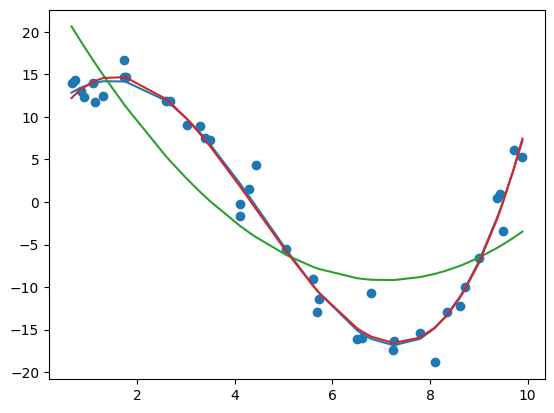

In [34]:
for i in (2,3):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(np.array(x2).reshape(40,1))

    model2 = sm.OLS(y2, X_poly)
    results2 = model2.fit()
    print(results2.summary())

    ypred = model2.predict(results2.params,X_poly)
    fig.gca().plot(x2,ypred,color = 'C{:d}'.format(i))
fig

### 指数拟合

$$
\begin{align*}
Y = b_0 e^{b_1X}\\
\log Y = \log b_0 + b_1 X\\
\end{align*}
$$

## 两个变量的相关性


- 相关系数(Correlation)

$$
\rho = \frac{\text{Cov}(x, y)}{\sqrt{\text{Var}(x) \text{Var}(y)}}
$$

- 用样本估计

$$
r = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sqrt{\sum (x - \bar{x})^2 \sum (y - \bar{y})^2}}
$$

- 假设检验：$\rho = 0$，$|r| < C$时接受检验
  
$$
\frac{\sqrt{n - 2}r}{\sqrt{1 - r^2}} \sim t_{n-2}
$$

$$
C = t_{n-2}(\alpha/2) \sqrt{\frac{n - 2 + t_{n-2}^2(\alpha/2)}{n - 2}}
$$

需要注意，在判断相关性的时候，要注意系统的自由度

系统自由度很低的时候（样本很少），就算相关系数求出来比较高，其实也不能支持这两个变量是相关的

观测值r的函数符合$t$分布

In [41]:
## C的取值
cl=[]
nl=[]
for n in range(10,100,5):
    tn=st.t.ppf(0.975,n-2)
    c=tn/np.sqrt(n-2+tn**2)
    cl.append(c)
    nl.append(n)
plt.plot(nl,cl)

## 偏相关

分析相关性，给x1和给x2差不多的话，就可以先去掉一个

取结果中方差最小的

根据全相关系数来求偏相关系数


> p值很大，支持原假设
> p值很小，不支持原假设




- 一组观测量 $X_i$ 中，互相之间有关联
  - $X_3$ 为一个人的收入，$X_1, X_2$ 为一个人在吃和穿上的花费
  - 观察到 $X_1, X_2$ 的正相关，$r > 0$
  - 实际 $X_1, X_2$ 均由 $X_3$ 带动，使得他们呈现正相关
  - 若能去掉 $X_3$ 的影响，观测它们的实际相关，可能转为负相关

- 重新定义 $X_1', X_2'$

$$
X_1' = X_1 - L(X_3 \cdots)
$$

$$
X_2' = X_2 - L'(X_3 \cdots)
$$

使得 $E(X_1')^2$ 和 $E(X_2')^2$ 最小

可以证明

$$
\rho(X_1', X_2') = (\rho_{12} - \rho_{13} \rho_{23})/[(1 - \rho_{13}^2)(1 - \rho_{23}^2)]^{1/2}
$$


将原本 $X$ 的相关矩阵写为
  
$$
P = \begin{pmatrix}
1 & \cdots & \rho_{1p} \\
\vdots & 1 & \vdots \\
\rho_{p1} & \cdots & 1
\end{pmatrix}
$$

记 $P_{ij}$ 为 $\rho(X_i', X_j')$ 为去掉第 $i$ 行第 $j$ 列后的行列式
- $\rho(X_1', X_2') = P_{12}/\sqrt{P_{11} P_{22}}$

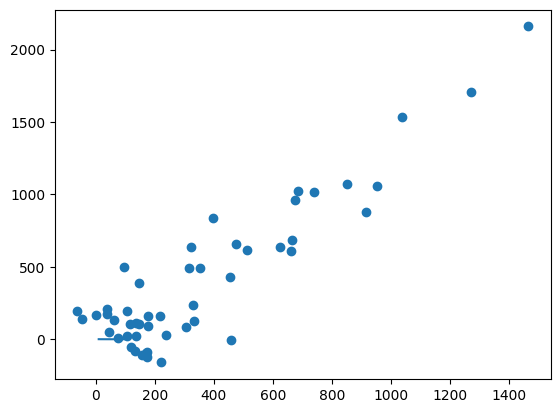

Correlation
           x         y         z
x  1.000000  0.905735  0.966893
y  0.905735  1.000000  0.983820
z  0.966893  0.983820  1.000000
Partial Correlation
           x         y         z
x  1.000000 -0.995529  0.998382
y -0.995529  1.000000  0.999203
z  0.998382  0.999203  1.000000
          n         r          CI95%         p-val
pearson  50 -0.995529  [-1.0, -0.99]  7.968338e-50
-0.9955289796281627
0.9992026123801186
0.9983816376785986


In [ ]:
%matplotlib inline
import pandas as pd

x3=st.expon(0,1000).rvs(50) # income
x1=np.random.normal(x3*0.4+30,100) # spent on eating
x2= np.random.normal(x3-x1-20,10) # spent on clothes
plt.scatter(x1,x2)
plt.show()
xyz=np.vstack((x1,x2,x3)).T

df = pd.DataFrame(xyz, columns = ['x', 'y', 'z']) 
print("Correlation\n",df.corr())
print("Partial Correlation\n",df.pcorr())
print(pg.partial_corr(data=df, x='x', y='y', covar='z',method='pearson'))

cor=np.corrcoef(xyz.T)

print((cor[0,1]-cor[0,2]*cor[1,2])/np.sqrt((1-cor[0,2]**2)*(1-cor[1,2]**2)))
print((cor[1,2]-cor[0,1]*cor[0,2])/np.sqrt((1-cor[0,1]**2)*(1-cor[0,2]**2)))
print((cor[0,2]-cor[0,1]*cor[1,2])/np.sqrt((1-cor[0,1]**2)*(1-cor[1,2]**2)))

In [43]:
meana=[23,34,51]

covD=np.array((4,5,6))

corD=[[1,0.5,0.9],[0.5,1,0.2],[0.9,0.2,1]]
cov=covD*covD.reshape(3,-1)*corD
print(np.array(corD))
mn=st.multivariate_normal(meana,cov)
xyz=mn.rvs(100)
df = pd.DataFrame(xyz, columns = ['x', 'y', 'z']) 
print(df.corr())
df.pcorr().round(3)

[[1.  0.5 0.9]
 [0.5 1.  0.2]
 [0.9 0.2 1. ]]
          x         y         z
x  1.000000  0.482271  0.901218
y  0.482271  1.000000  0.174900
z  0.901218  0.174900  1.000000


,x,y,z
x,1.000,0.761,0.947
y,0.761,1.000,-0.684
z,0.947,-0.684,1.000
